In [8]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('resim.jpg', cv2.IMREAD_GRAYSCALE)

In [10]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
canny = cv2.Canny(img, 100, 200)

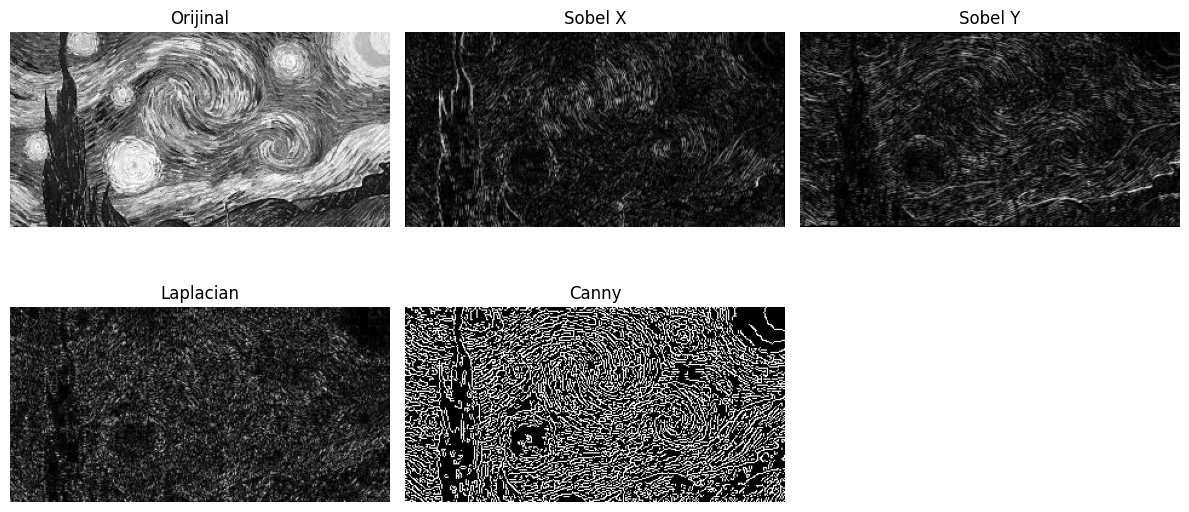

In [11]:
titles = ['Orijinal', 'Sobel X', 'Sobel Y', 'Laplacian', 'Canny']
images = [img, sobelx, sobely, laplacian, canny]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(np.abs(images[i]), cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

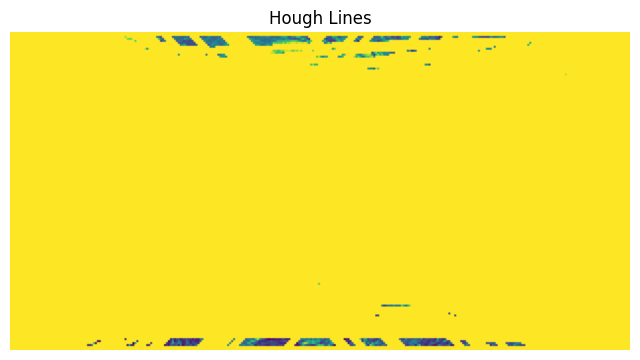

In [13]:

edges = cv2.Canny(img, 50, 150)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 120)

line_img = img.copy()

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2) 

plt.figure(figsize=(8, 8))
plt.imshow(line_img)
plt.title("Hough Lines")
plt.axis('off')
plt.show()